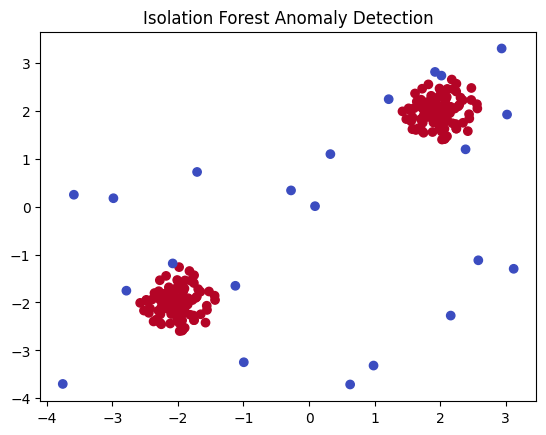

In [1]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
rng = np.random.RandomState(42)
normal_data = 0.3 * rng.randn(100, 2)
outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[normal_data + 2, normal_data - 2, outliers]

# Fit model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# Predict
labels = model.predict(X)

# Convert to DataFrame
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Anomaly"] = labels  # -1 = anomaly, 1 = normal

# Visualize
plt.scatter(df["Feature1"], df["Feature2"], c=df["Anomaly"], cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.show()


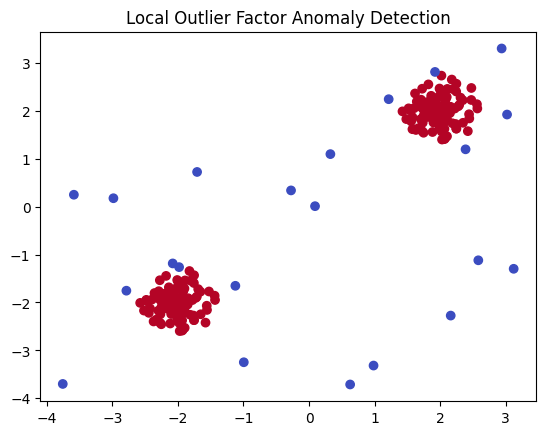

In [1]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create synthetic data
rng = np.random.RandomState(42)
normal_data = 0.3 * rng.randn(100, 2)
outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[normal_data + 2, normal_data - 2, outliers]

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
labels = lof.fit_predict(X)  # -1 = outlier, 1 = inlier

# Store in DataFrame
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Anomaly"] = labels

# Visualize
plt.scatter(df["Feature1"], df["Feature2"], c=df["Anomaly"], cmap="coolwarm")
plt.title("Local Outlier Factor Anomaly Detection")
plt.show()


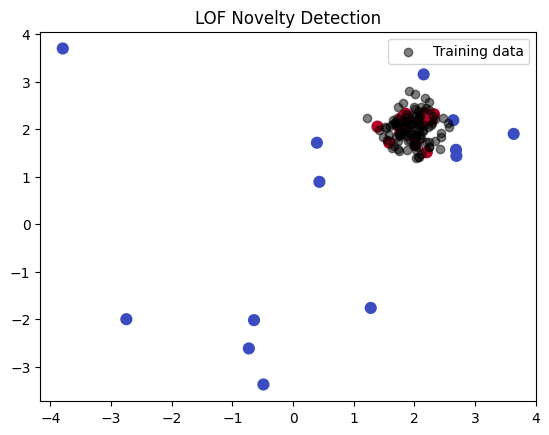

In [2]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Generate normal training data
rng = np.random.RandomState(42)
X_train = 0.3 * rng.randn(100, 2) + 2  # centered around (2, 2)

# Generate new test data (some normal, some anomalies)
X_test = np.r_[0.3 * rng.randn(20, 2) + 2,    # normal
               rng.uniform(low=-4, high=4, size=(10, 2))]  # anomalies

# Create LOF model for novelty detection
lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof.fit(X_train)

# Predict on new data
y_pred = lof.predict(X_test)  # 1 = normal, -1 = anomaly

# Visualize
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm", s=60)
plt.scatter(X_train[:, 0], X_train[:, 1], color="black", label="Training data", alpha=0.5)
plt.title("LOF Novelty Detection")
plt.legend()
plt.show()
